In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [480]:
RANDOM_SEED = 4
RANDOM_SEED_EXAMPLE = 5
INIT_ALPHA = 0.1

# Functions

In [294]:
def generate_random_rgb_grid(height: int, width: int):
    np.random.seed(RANDOM_SEED)
    imgdata = np.random.random((height, width, 3))
    return imgdata

def generate_random_examples(n):
    np.random.seed(RANDOM_SEED_EXAMPLE)
    return np.random.random((n, 3))

In [355]:
def index_to_coords(index_1d, height, width):
    return np.vstack((index_1d // width, index_1d % height)).T

In [231]:
def get_coords_matrix(matrix_shape) -> np.array:
    """Generate a 2d coordinates matrix"""
    return np.vstack(np.indices(matrix_shape)).reshape(2,-1).T.reshape(matrix_shape[0], matrix_shape[1], 2)

In [389]:
def get_initial_radius(grid: np.array) -> float:
    """Self explainatory"""
    return (max(grid.shape))/2

def get_time_step_params(sigma0: float, alpha0: float, lambda_: float, t: int) -> tuple:
    """Get the sigma and alpha for a give time step t"""
    if t == 0:
        return sigma0, alpha0
    sigma = sigma0 * np.exp(-(t/lambda_))
    alpha = alpha0 * np.exp(-(t/lambda_))
    return sigma, alpha

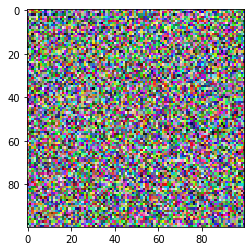

In [489]:
n_examples = 20
max_iter = 1000

height = 100
width = 100

examples = generate_random_examples(n_examples)

weights = generate_random_rgb_grid(height,width).reshape(-1, 3)

coords_grid = get_coords_matrix((height, width))
coords1d = coords_grid.reshape(-1,2)

sigma0 = get_initial_radius(coords_grid)
alpha0 = INIT_ALPHA
lambda_ = max_iter / np.log(sigma0)

plt.imshow(weights.reshape(height, width, 3))

In [490]:
%%time

for t in range(max_iter):
    sigma, alpha = get_time_step_params(sigma0, alpha0, lambda_, t)

    sqr_dist_to_example = np.sum((np.expand_dims(weights, -2) - examples)**2, axis=-1)
    bmu_index = sqr_dist_to_example.argmin(axis=0)
    bmu = index_to_coords(bmu_index, height, width)
    sqr_dist_to_bmu = np.sum( (np.expand_dims(coords1d,-2) - bmu)**2, axis=-1)
    influences = np.exp(- sqr_dist_to_bmu / (2 * sigma**2)) # * (sqr_dist_to_bmu<=sigma**2)
    incre_weights = alpha * np.expand_dims(influences, -1) * (examples - np.expand_dims(weights, -2))
    weights = weights + incre_weights.swapaxes(1,2).sum(axis=-1)

CPU times: user 14.3 s, sys: 84.1 ms, total: 14.4 s
Wall time: 14.5 s


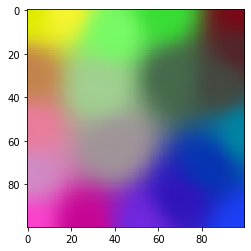

In [491]:
plt.imshow(weights.reshape(height, width, 3))

In [459]:
t = 0
%time sigma, alpha = get_time_step_params(sigma0, alpha0, lambda_, t)

%time sqr_dist_to_example = np.sum((np.expand_dims(weights, -2) - examples)**2, axis=-1)
%time bmu_index = sqr_dist_to_example.argmin(axis=0)
%time bmu = index_to_coords(bmu_index, height, width)
%time sqr_dist_to_bmu = np.sum( (np.expand_dims(coords1d,-2) - bmu)**2, axis=-1)
%time influences = np.exp(- sqr_dist_to_bmu / (2 * sigma**2)) # * (sqr_dist_to_bmu<=sigma**2)
%time incre_weights = alpha * np.expand_dims(influences, -1) * (examples - np.expand_dims(weights, -2))
%time weights = weights + incre_weights.swapaxes(1,2).sum(axis=-1)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.9 µs
CPU times: user 7.59 ms, sys: 1.41 ms, total: 9 ms
Wall time: 7.68 ms
CPU times: user 1.08 ms, sys: 181 µs, total: 1.27 ms
Wall time: 1.02 ms
CPU times: user 50 µs, sys: 13 µs, total: 63 µs
Wall time: 65.1 µs
CPU times: user 2.17 ms, sys: 201 µs, total: 2.37 ms
Wall time: 2.11 ms
CPU times: user 2.29 ms, sys: 316 µs, total: 2.6 ms
Wall time: 2.44 ms
CPU times: user 4.76 ms, sys: 424 µs, total: 5.18 ms
Wall time: 5.02 ms
CPU times: user 4.24 ms, sys: 157 µs, total: 4.4 ms
Wall time: 4.23 ms


In [461]:
%%time
t = 0
sigma, alpha = get_time_step_params(sigma0, alpha0, lambda_, t)

sqr_dist_to_example = np.sum((np.expand_dims(weights, -2) - examples)**2, axis=-1)
bmu_index = sqr_dist_to_example.argmin(axis=0)
bmu = index_to_coords(bmu_index, height, width)
sqr_dist_to_bmu = np.sum( (np.expand_dims(coords1d,-2) - bmu)**2, axis=-1)
influences = np.exp(- sqr_dist_to_bmu / (2 * sigma**2)) # * (sqr_dist_to_bmu<=sigma**2)
incre_weights = alpha * np.expand_dims(influences, -1) * (examples - np.expand_dims(weights, -2))
weights = weights + incre_weights.swapaxes(1,2).sum(axis=-1)

CPU times: user 21.1 ms, sys: 2.53 ms, total: 23.6 ms
Wall time: 21.8 ms
